In [20]:
import polars as pl

In [21]:
dfTips = pl.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/tips.csv")

In [22]:
dfTipsMean = dfTips.group_by(pl.col("day")).mean().sort(pl.col("day"))
dfTipsMean

day,total_bill,tip,sex,smoker,time,size
str,f64,f64,str,str,str,f64
"""Fri""",17.151579,2.734737,null,null,null,2.105263
"""Sat""",20.441379,2.993103,null,null,null,2.517241
"""Sun""",21.41,3.255132,null,null,null,2.842105
"""Thur""",17.682742,2.771452,null,null,null,2.451613


In [23]:
dfTipsMean = dfTipsMean.with_columns(pl.col("day")
                        .replace({"Fri": "(5) Fri", 
                                  "Sat": "(6) Sat", 
                                  "Sun": "(7) Sun", 
                                  "Thur": "(4) Thur"})
                        .alias("day")).sort(pl.col("day"))


dfTipsMean

day,total_bill,tip,sex,smoker,time,size
str,f64,f64,str,str,str,f64
"""(4) Thur""",17.682742,2.771452,null,null,null,2.451613
"""(5) Fri""",17.151579,2.734737,null,null,null,2.105263
"""(6) Sat""",20.441379,2.993103,null,null,null,2.517241
"""(7) Sun""",21.41,3.255132,null,null,null,2.842105


<Axes: xlabel='day', ylabel='tip'>

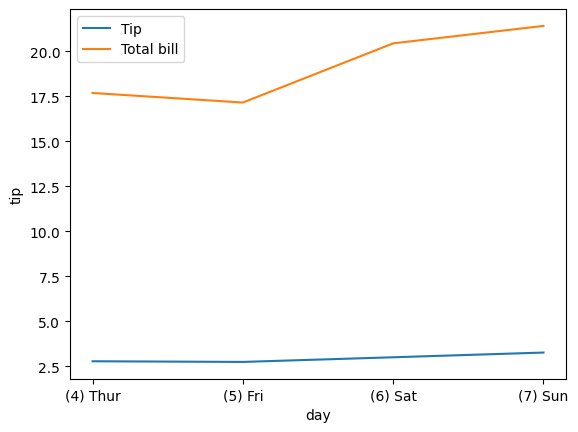

In [40]:
import seaborn as sns

sns.lineplot(data=dfTipsMean.to_pandas(), x="day", y="tip", label="Tip")
sns.lineplot(data=dfTipsMean.to_pandas(), x="day", y="total_bill", label="Total bill")

In [30]:
dfTips.describe()

statistic,total_bill,tip,sex,smoker,day,time,size
str,f64,f64,str,str,str,str,f64
"""count""",244.0,244.0,"""244""","""244""","""244""","""244""",244.0
"""null_count""",0.0,0.0,"""0""","""0""","""0""","""0""",0.0
"""mean""",19.785943,2.998279,null,null,null,null,2.569672
"""std""",8.902412,1.383638,null,null,null,null,0.9511
"""min""",3.07,1.0,"""Female""","""No""","""Fri""","""Dinner""",1.0
"""25%""",13.37,2.0,null,null,null,null,2.0
"""50%""",17.81,2.92,null,null,null,null,2.0
"""75%""",24.08,3.55,null,null,null,null,3.0
"""max""",50.81,10.0,"""Male""","""Yes""","""Thur""","""Lunch""",6.0


<Axes: xlabel='tip', ylabel='Count'>

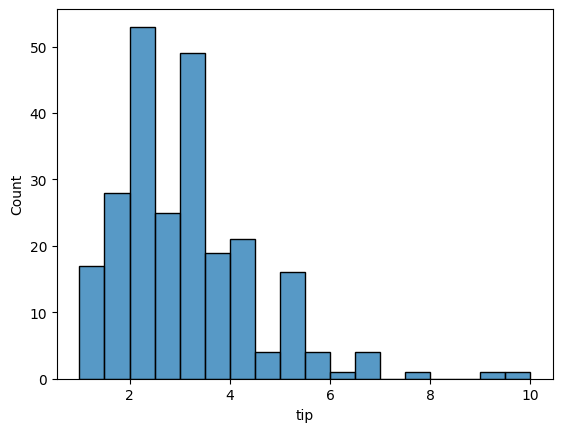

In [34]:
sns.histplot(dfTips.to_pandas(), x="tip")

In [36]:
#ponizej 2 - niski
#2-5 - sredni
#powyzej 5 - wysoki

dfTips.with_columns(pl.when(pl.col("tip") < 2).then(0)
                    .when((pl.col("tip") >= 2) & (pl.col("tip") < 5)).then(1)
                    .otherwise(2).alias("tip_class"))

dfTips.with_columns(pl.col("tip").qcut(3).alias("tip_class_qcut"))

total_bill,tip,sex,smoker,day,time,size,tip_class_qcut
f64,f64,str,str,str,str,i64,cat
16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2,"""(-inf, 2.03]"""
10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3,"""(-inf, 2.03]"""
21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3,"""(3.25, inf]"""
23.68,3.31,"""Male""","""No""","""Sun""","""Dinner""",2,"""(3.25, inf]"""
24.59,3.61,"""Female""","""No""","""Sun""","""Dinner""",4,"""(3.25, inf]"""
…,…,…,…,…,…,…,…
29.03,5.92,"""Male""","""No""","""Sat""","""Dinner""",3,"""(3.25, inf]"""
27.18,2.0,"""Female""","""Yes""","""Sat""","""Dinner""",2,"""(-inf, 2.03]"""
22.67,2.0,"""Male""","""Yes""","""Sat""","""Dinner""",2,"""(-inf, 2.03]"""
